In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/home/mahaputra971/pt_skp/agoda_reviews_final.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   reviewer_name       158 non-null    object 
 1   user_country        154 non-null    object 
 2   room_type           138 non-null    object 
 3   stay_duration_days  158 non-null    int64  
 4   rating              158 non-null    float64
 5   review_text         158 non-null    object 
 6   review_date         154 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.8+ KB


In [5]:
df.head(10)

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date
0,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,"January 08, 2025"
1,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,"May 31, 2025"
2,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,"August 11, 2025"
3,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,"June 06, 2025"
4,公司,Japan,2 Bedroom Villa,5,10.0,I stayed in August 2023. Since there was only ...,NaN
5,Mike,United States,1 Bedroom Suite,1,10.0,This place is really exceptional! Right on the...,"March 04, 2025"
6,Keith,Australia,Family for 4,8,8.8,Great week for a family of 4 with a baby and a...,"October 27, 2024"
7,Callum,Australia,Family for 4,4,8.0,Stunning location and amazing staff. We loved ...,"July 14, 2024"
8,Kathleen,Australia,1 Bedroom Suite,14,10.0,Pondok Pitaya is a gem. It's a few hours drive...,"September 13, 2024"
9,Michelle,Australia,Family for 4,3,10.0,This resort exceeds all expectations. It was s...,"September 17, 2024"


In [6]:
df['review_date'] = pd.to_datetime(df['review_date'])
print(df['review_date'].dtypes)

datetime64[ns]


In [7]:
df.head() 

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date
0,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,2025-01-08
1,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,2025-05-31
2,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,2025-08-11
3,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,2025-06-06
4,公司,Japan,2 Bedroom Villa,5,10.0,I stayed in August 2023. Since there was only ...,NaT


In [8]:
def plot_barplot(data, x_col, y_col, title="", format_number="", x_label="", y_label="", colour_bar_set="3"):
    plt.figure(figsize=(10, max(6, len(data) * 0.4))) # Tinggi otomatis menyesuaikan banyaknya negara

    # --- 1. DETEKSI OTOMATIS: VERTIKAL ATAU HORIZONTAL? ---
    # Jika Y-nya angka, berarti Vertikal. Jika Y-nya teks, berarti Horizontal.
    if pd.api.types.is_numeric_dtype(data[y_col]):
        orientation = 'vertical'
        color_basis = data[y_col] # Warna ikut tinggi Y
    else:
        orientation = 'horizontal'
        color_basis = data[x_col] # Warna ikut panjang X (Jumlah)

    # --- 2. LOGIKA WARNA ---
    if colour_bar_set == "1": # Tinggi=Hijau
        norm = plt.Normalize(color_basis.min(), color_basis.max())
        sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
        colors = [sm.to_rgba(val) for val in color_basis]
    elif colour_bar_set == "2": # Tinggi=Merah
        norm = plt.Normalize(color_basis.min(), color_basis.max())
        sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)
        colors = [sm.to_rgba(val) for val in color_basis]
    else: # Mode 3 (Default Biru - Aman untuk Kategori)
        colors = ["#4c72b0"] * len(data)
        sm = None

    # --- 3. MEMBUAT PLOT ---
    barplot = sns.barplot(
        x=x_col, 
        y=y_col,
        data=data,
        palette=colors,
        hue=y_col if orientation == 'horizontal' else x_col, # Fix warning seaborn baru
        legend=False
    )

    # --- 4. MEMBERI LABEL ANGKA (SMART POSITIONING) ---
    for bar in barplot.patches:
        # Ambil dimensi batang
        width = bar.get_width()
        height = bar.get_height()
        
        # Tentukan nilai yang akan ditulis
        value = width if orientation == 'horizontal' else height
        if np.isnan(value): continue

        # Format label
        if isinstance(value, float):
            label_text = f"{format_number}{value:.2f}"
            if value.is_integer(): label_text = f"{format_number}{int(value)}"
        else:
            label_text = f"{format_number}{int(value)}"

        # Tentukan posisi teks
        if orientation == 'horizontal':
            # Jika horizontal, teks ditaruh di sebelah kanan ujung batang
            text_x = width + (data[x_col].max() * 0.01) # Beri sedikit jarak
            text_y = bar.get_y() + height / 2
            ha_align = 'left'
            color_text = 'black' # Teks hitam biar terbaca di background putih
        else:
            # Jika vertikal, teks ditaruh di tengah/atas batang
            text_x = bar.get_x() + width / 2
            text_y = bar.get_y() + height / 2
            ha_align = 'center'
            color_text = 'white'

        plt.text(
            text_x, 
            text_y, 
            label_text, 
            va='center', 
            ha=ha_align, 
            fontsize=10, 
            color=color_text, 
            weight='bold'
        )

    # Kosmetik
    plt.title(title, loc="center", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(x_label if x_label else x_col, fontsize=12)
    plt.ylabel(y_label if y_label else y_col, fontsize=12)
    
    if orientation == 'vertical':
        plt.grid(axis='y', linestyle='--', alpha=0.3)
    else:
        plt.grid(axis='x', linestyle='--', alpha=0.3) # Grid X untuk horizontal

    plt.tight_layout()
    plt.show()

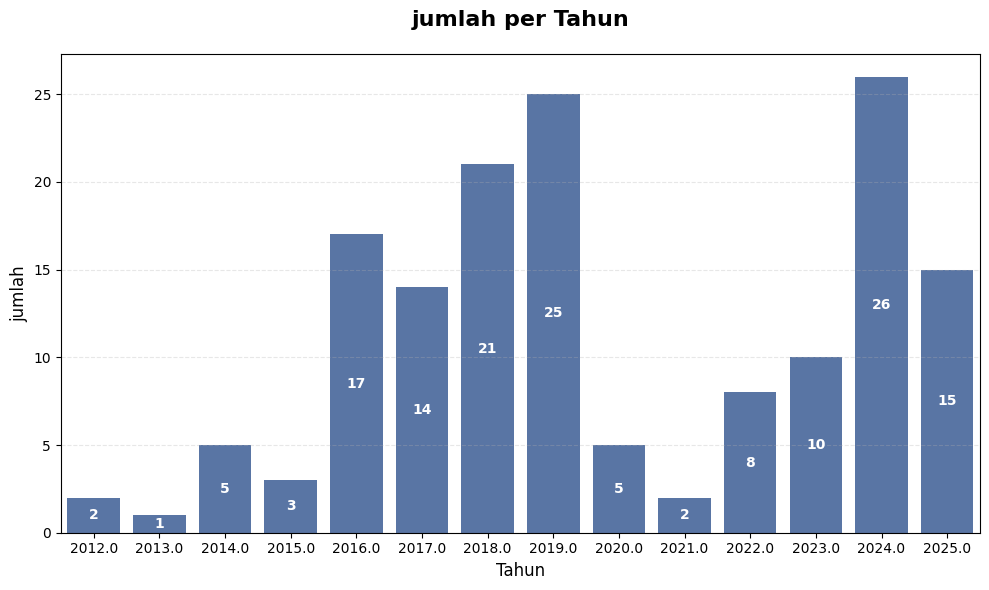

,tahun,jumlah
0,2012.0,2
1,2013.0,1
2,2014.0,5
3,2015.0,3
4,2016.0,17
5,2017.0,14
6,2018.0,21
7,2019.0,25
8,2020.0,5
9,2021.0,2


In [9]:
# --- 1. DATA PREPARATION ---

# Pastikan kolom tanggal bertipe datetime
# Jika format tanggalmu beda (misal: "12 Dec 2023"), pandas biasanya otomatis mengenali
df['review_date'] = pd.to_datetime(df['review_date'])

# Ekstrak tahun ke kolom baru
df['year'] = df['review_date'].dt.year

# Hitung jumlah review per tahun dan URUTKAN BERDASARKAN TAHUN (sort_index)
# Kita pakai sort_index() agar tahunnya urut (2020, 2021, 2022...), bukan acak.
year_counts = df['year'].value_counts().sort_index()

# Konversi ke DataFrame agar mudah di-plot seaborn
year_df = year_counts.reset_index()
year_df.columns = ['tahun', 'jumlah']

# --- 2. VISUALISASI (Best Practice) ---

plot_barplot(
    data=year_df, 
    x_col="tahun", 
    y_col="jumlah", 
    title="jumlah per Tahun", 
    x_label="Tahun",
    y_label="jumlah",
    colour_bar_set="3" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

year_df

In [10]:
df

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date,year
0,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,2025-01-08,2025.0
1,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,2025-05-31,2025.0
2,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,2025-08-11,2025.0
3,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,2025-06-06,2025.0
4,公司,Japan,2 Bedroom Villa,5,10.0,I stayed in August 2023. Since there was only ...,NaT,NaN
...,...,...,...,...,...,...,...,...
153,philippa,Australia,1 Bedroom Suite,3,9.2,Great place to relax and slow down. Very Balin...,2023-12-04,2023.0
154,CRAIG,Australia,1 Bedroom Suite,22,10.0,Excellent accomm right on Balian surf break.,2023-07-17,2023.0
155,Coen,Indonesia,1 Bedroom Suite,1,6.0,The location is the drawcard.\nNice gardens.\n...,2023-09-26,2023.0
156,Luke,Australia,1 Bedroom Suite,5,5.2,"Could be much better, everything is old, bed w...",2023-07-14,2023.0


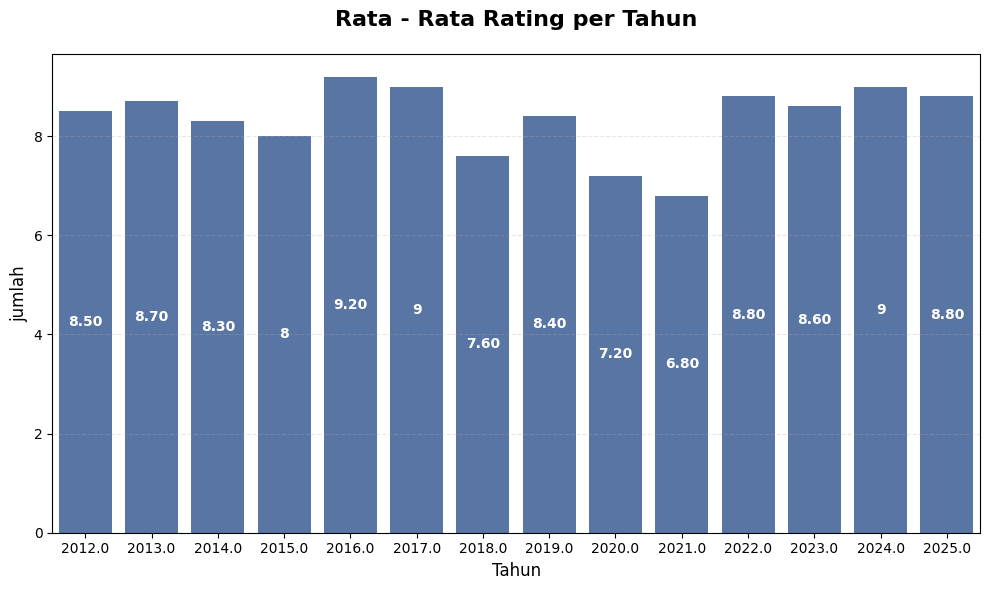

In [11]:

plot_barplot(
    data=df.reset_index().groupby('year').rating.median().reset_index(name='rating'), 
    x_col="year", 
    y_col="rating", 
    title="Rata - Rata Rating per Tahun", 
    x_label="Tahun",
    y_label="jumlah",
    colour_bar_set="3" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

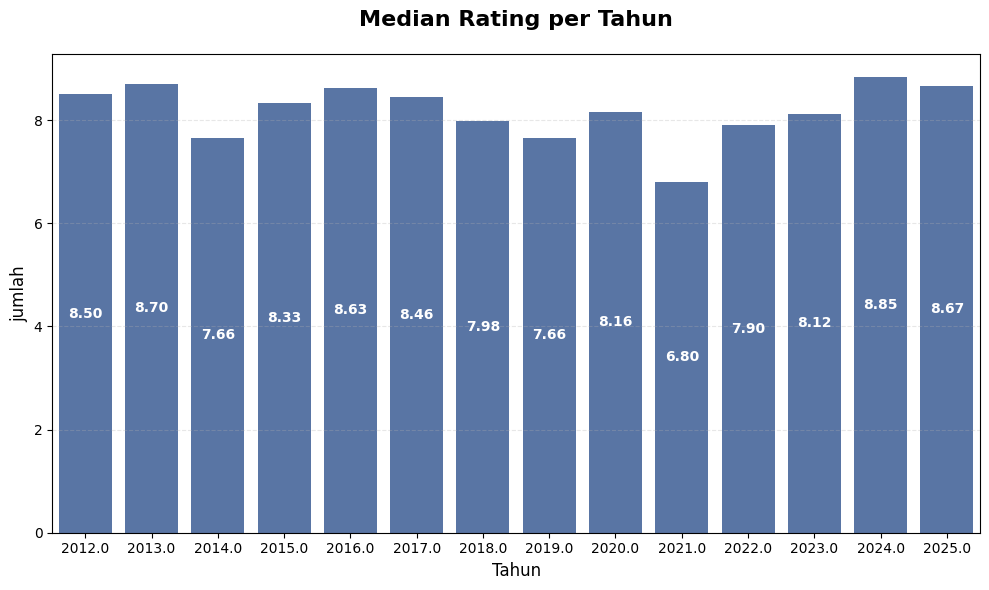

In [12]:

plot_barplot(
    data=df.reset_index().groupby('year').rating.mean().reset_index(name='rating'), 
    x_col="year", 
    y_col="rating", 
    title="Median Rating per Tahun", 
    x_label="Tahun",
    y_label="jumlah",
    colour_bar_set="3" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

## 2. Text Mining

In [13]:
# Pastikan nama kolom tahun sesuai (misal 'Year' atau 'year')
# zip menggabungkan dua kolom menjadi pasangan
review_with_year = list(zip(df['year'], df['review_text']))

# Cek 5 data pertama
print(review_with_year)

[(2025.0, "A most amazing spot for a relaxed getaway from the chaos that has dominated most of Bali's beaches. This hotel is right by the break, perfect for surfers and beach lovers alike.\n\nThe staff are very kind and welcoming and always at your service. The grounds are really well thought out and can often times be quite majestic to walk around in. Finally, for the rooms, they are well designed with comfortable beds, however, it's a real shame that the walls are paper thin so if you have neighbors, you can hear everything that happens in the next room, even whispers.\n\nBut, all in all, a great getaway!"), (2025.0, 'This place was great. Ticked both boxes. Yoga for my girlfriend and surfing for me. \nGreat location with a great restaurant. \nThere are a few other places to eat around and about and some touristy things to fill in a few days. The pool was pretty nice as well. \nIf we go back to Balian we would definitely stay there again. \nCouple of things. \nRooms need a fan and a 

## 3. user_country

      user_country  jumlah
0        Australia      78
5        Indonesia      12
9            Japan       9
20  United Kingdom       8
21   United States       7
4          Germany       6
12     New Zealand       6
2           Canada       5
11     Netherlands       5
3           France       4
15          Russia       2
19     Switzerland       2
10        Malaysia       1
1          Austria       1
8            Italy       1
6          Ireland       1
14          Poland       1
16       Singapore       1
17    South Africa       1
18           Spain       1
7           Israel       1
13            Oman       1


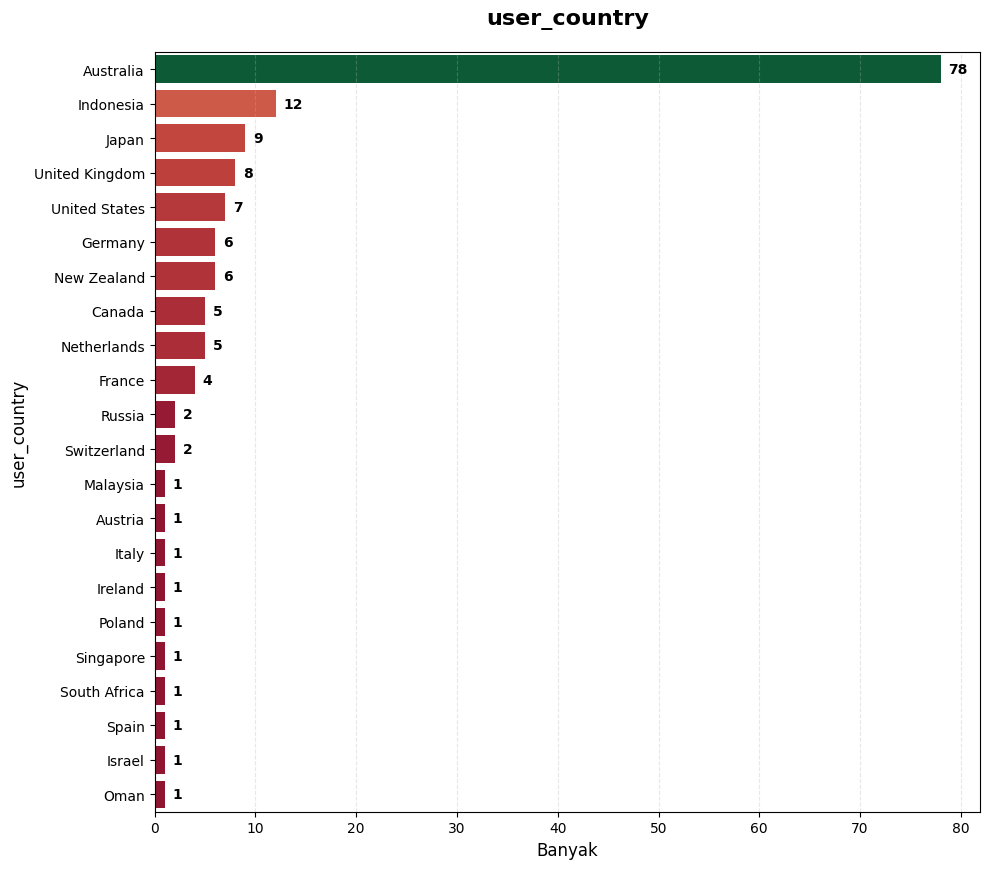

In [14]:
''' 
Membuat sort list dan visualisasi banyak orang tiap user_country
'''
count_gender = df.groupby('user_country').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="jumlah",
    y_col="user_country", 
    title="user_country",
    format_number="",
    x_label="Banyak",
    colour_bar_set="1"
)

          room_type  jumlah
0   1 Bedroom Suite     122
1   2 Bedroom Villa       6
2      Family for 4       5
3  Villa (4 Adults)       5


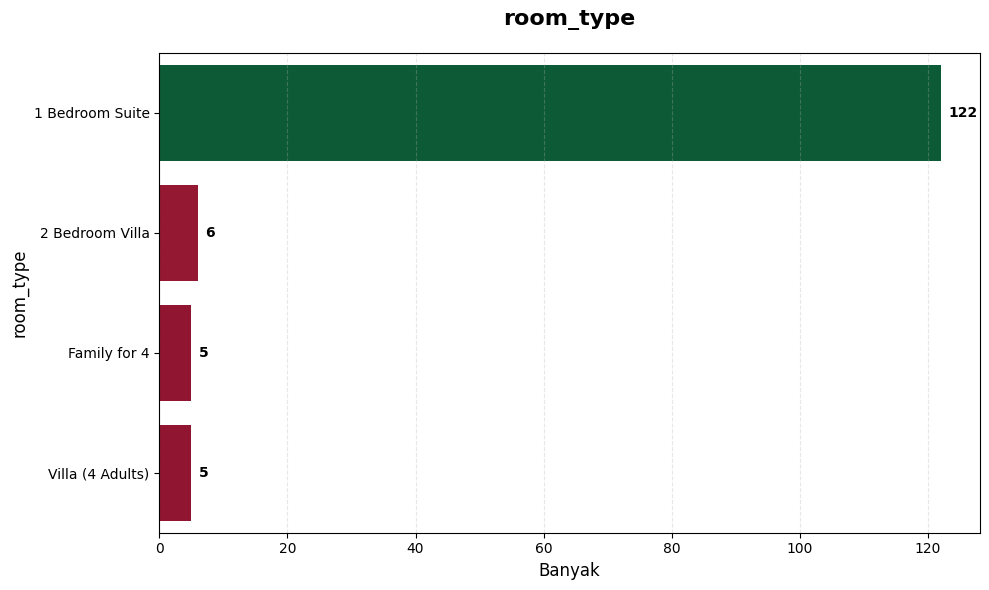

In [15]:
''' 
Membuat sort list dan visualisasi banyak orang tiap room_view
'''
count_gender = df.groupby('room_type').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="jumlah",
    y_col="room_type", 
    title="room_type",
    format_number="",
    x_label="Banyak",
    colour_bar_set="1"
)

    stay_duration_days  jumlah
0                    1      40
2                    3      37
1                    2      30
3                    4      20
4                    5      15
5                    6       4
7                    8       4
6                    7       3
8                   10       1
9                   11       1
10                  12       1
11                  14       1
12                  22       1


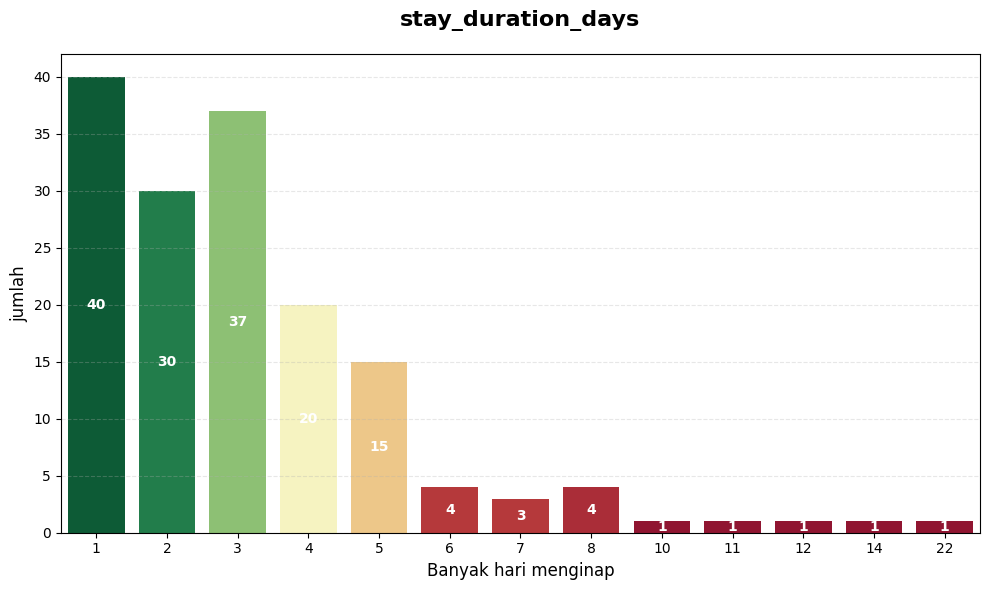

In [16]:
''' 
Membuat sort list dan visualisasi banyak orang tiap stay_duration_days
'''
count_gender = df.groupby('stay_duration_days').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="stay_duration_days",
    y_col="jumlah", 
    title="stay_duration_days",
    format_number="",
    x_label="Banyak hari menginap",
    colour_bar_set="1"
)

In [17]:
def plot_multivariate_barplot(df, x_col, hue_col, title="", x_label="", y_label="Jumlah", top_n_hue=5, palette="viridis"):
    """
    Fungsi template Grouped Bar Chart + Garis Tren (FIXED ALIGNMENT).
    """
    
    # --- 1. DATA PREPARATION ---
    data_grouped = df.groupby([x_col, hue_col]).size().reset_index(name='counts')

    # --- 2. FILTER TOP N ---
    top_categories = df[hue_col].value_counts().nlargest(top_n_hue).index.tolist()
    data_filtered = data_grouped[data_grouped[hue_col].isin(top_categories)].copy() # Gunakan .copy() agar aman
    
    # [PENTING] Urutkan berdasarkan Tahun agar garis tidak zig-zag
    data_filtered = data_filtered.sort_values(by=x_col)
    
    # [PENTING] Ubah Tahun menjadi String agar dianggap KATEGORI (bukan angka 0-2000)
    data_filtered[x_col] = data_filtered[x_col].astype(str)

    # --- 3. PRINT TABEL ---
    print("\n" + "="*60)
    print(f"📊 DATA TABEL: {title}")
    print(f"(Hanya menampilkan Top {top_n_hue} kategori '{hue_col}')")
    print("="*60)
    
    try:
        table_view = data_filtered.pivot(index=x_col, columns=hue_col, values='counts').fillna(0).astype(int)
        print(table_view)
    except Exception as e:
        print(f"Gagal membuat tabel pivot: {e}")

    print("-" * 60 + "\n")

    # --- 4. VISUALISASI ---
    plt.figure(figsize=(12, 6))
    
    # LAYER 1: BAR PLOT
    sns.barplot(
        data=data_filtered,
        x=x_col,
        y='counts',
        hue=hue_col,
        palette=palette,
        edgecolor='black',
        linewidth=0.5,
        alpha=0.5 # Transparan agar garis terlihat jelas
    )

    # LAYER 2: POINT PLOT (Pengganti Lineplot)
    # Pointplot otomatis mensejajarkan titik tepat di tengah batang kategori
    sns.pointplot(
        data=data_filtered,
        x=x_col,
        y='counts',
        hue=hue_col,
        palette=palette,
        markers="o",      # Titik bulat
        linestyles="-",   # Garis sambung
        scale=0.7,        # Ukuran titik
        errorbar=None     # Matikan error bar
    )

    # Kosmetik Grafik
    plt.title(title, fontsize=16, fontweight='bold', pad=15)
    plt.xlabel(x_label if x_label else x_col, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # Perbaiki Legend (Hapus duplikat karena ada 2 plot)
    handles, labels = plt.gca().get_legend_handles_labels()
    # Ambil setengah pertama saja (milik barplot)
    plt.legend(handles[:len(top_categories)], labels[:len(top_categories)], title=hue_col, title_fontsize='11', fontsize='10')
    
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.xticks(rotation=0) 
    plt.tight_layout()
    plt.show()


📊 DATA TABEL: Tren Durasi Menginap per Tahun
(Hanya menampilkan Top 4 kategori 'stay_duration_days')
stay_duration_days  1  2  3  4
year                          
2012.0              0  1  1  0
2013.0              0  1  0  0
2014.0              1  1  2  0
2015.0              1  0  1  0
2016.0              2  1  6  4
2017.0              2  4  3  2
2018.0              9  2  2  2
2019.0              7  6  7  2
2020.0              2  1  0  1
2021.0              1  1  0  0
2022.0              2  3  2  1
2023.0              3  1  3  1
2024.0              5  4  6  3
2025.0              4  3  4  3
------------------------------------------------------------



/tmp/ipykernel_12619/606699496.py:50: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


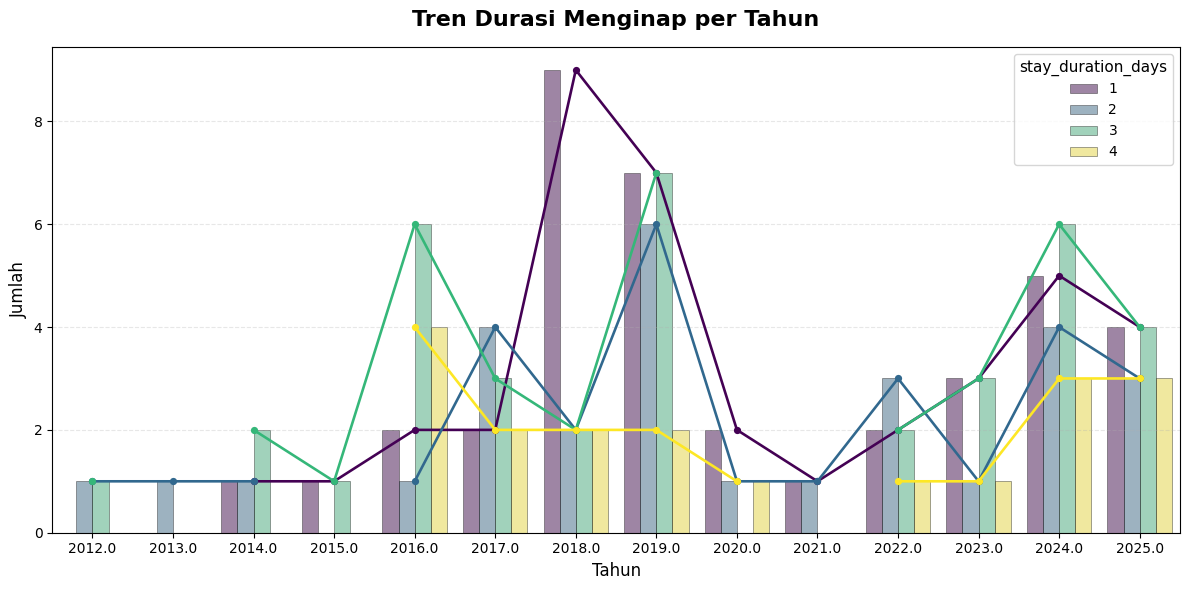

In [18]:
plot_multivariate_barplot(
    df=df,
    x_col="year",
    hue_col="stay_duration_days", # Ganti dengan nama kolom hasil regex tadi
    title="Tren Durasi Menginap per Tahun",
    x_label="Tahun",
    top_n_hue=4 # Hanya ambil 4 durasi terpopuler (misal 1, 2, 3, 4 malam)
)


📊 DATA TABEL: Tren segmen market negara per Tahun
(Hanya menampilkan Top 4 kategori 'user_country')
user_country  Australia  Indonesia  Japan  United Kingdom
year                                                     
2012.0                0          0      0               1
2013.0                1          0      0               0
2014.0                4          0      0               0
2015.0                2          0      0               0
2016.0               11          0      1               1
2017.0                5          0      2               1
2018.0                7          2      1               4
2019.0               12          2      1               0
2021.0                0          2      0               0
2022.0                3          2      0               0
2023.0                4          2      0               0
2024.0               22          0      0               0
2025.0                7          2      0               1
-----------------------------

/tmp/ipykernel_12619/606699496.py:50: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


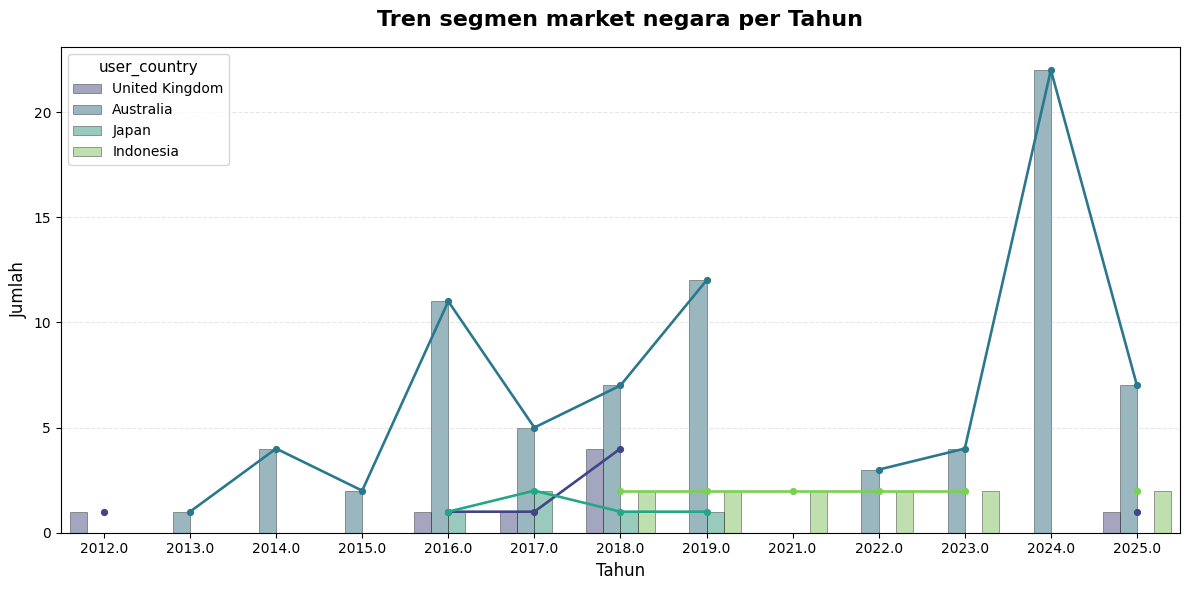

In [19]:
plot_multivariate_barplot(
    df=df,
    x_col="year",
    hue_col="user_country", # Ganti dengan nama kolom hasil regex tadi
    title="Tren segmen market negara per Tahun",
    x_label="Tahun",
    top_n_hue=4 # Hanya ambil 4 durasi terpopuler (misal 1, 2, 3, 4 malam)
)

In [20]:
df

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date,year
0,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,2025-01-08,2025.0
1,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,2025-05-31,2025.0
2,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,2025-08-11,2025.0
3,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,2025-06-06,2025.0
4,公司,Japan,2 Bedroom Villa,5,10.0,I stayed in August 2023. Since there was only ...,NaT,NaN
...,...,...,...,...,...,...,...,...
153,philippa,Australia,1 Bedroom Suite,3,9.2,Great place to relax and slow down. Very Balin...,2023-12-04,2023.0
154,CRAIG,Australia,1 Bedroom Suite,22,10.0,Excellent accomm right on Balian surf break.,2023-07-17,2023.0
155,Coen,Indonesia,1 Bedroom Suite,1,6.0,The location is the drawcard.\nNice gardens.\n...,2023-09-26,2023.0
156,Luke,Australia,1 Bedroom Suite,5,5.2,"Could be much better, everything is old, bed w...",2023-07-14,2023.0


          room_type    rating
3  Villa (4 Adults)  7.440000
1   2 Bedroom Villa  8.216667
0   1 Bedroom Suite  8.350820
2      Family for 4  8.960000


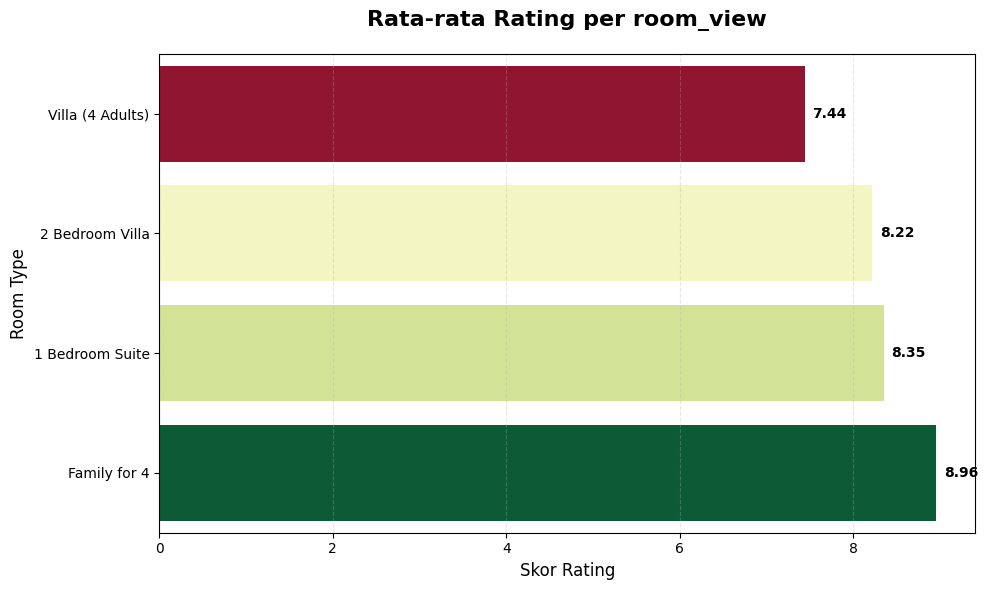

In [21]:
# Reset index agar 'Year' kembali menjadi kolom
rating_room_year = df.groupby('room_type')['rating'].mean().reset_index()

rating_room_year = rating_room_year[rating_room_year!= 0]

# Opsional: Urutkan tahun biar rapi
rating_room_year = rating_room_year.sort_values('rating')

print(rating_room_year)

# --- CARA PENGGUNAAN ---
plot_barplot(
    data=rating_room_year , 
    x_col="rating", 
    y_col="room_type", 
    title="Rata-rata Rating per room_view", 
    x_label="Skor Rating",
    y_label="Room Type",
    colour_bar_set="1" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

In [22]:
filtered_df = df[df['review_text'] != 0].copy()
# Baru di-grouping
dislike_by_room_view = filtered_df.groupby('room_type')['review_text'].apply(list)

# --- CARA MENGAKSES HASILNYA (Sama seperti kodemu) ---
print("=== Statistik Dislike per Kamar ===")
for room_type, comments in dislike_by_room_view.items():
    print(f"Pada {room_type}: Ditemukan {len(comments)} komentar.")
    print(f"{comments}") 
    print("-" * 30)

=== Statistik Dislike per Kamar ===
Pada 1 Bedroom Suite: Ditemukan 122 komentar.
["A most amazing spot for a relaxed getaway from the chaos that has dominated most of Bali's beaches. This hotel is right by the break, perfect for surfers and beach lovers alike.\n\nThe staff are very kind and welcoming and always at your service. The grounds are really well thought out and can often times be quite majestic to walk around in. Finally, for the rooms, they are well designed with comfortable beds, however, it's a real shame that the walls are paper thin so if you have neighbors, you can hear everything that happens in the next room, even whispers.\n\nBut, all in all, a great getaway!", 'This place was great. Ticked both boxes. Yoga for my girlfriend and surfing for me. \nGreat location with a great restaurant. \nThere are a few other places to eat around and about and some touristy things to fill in a few days. The pool was pretty nice as well. \nIf we go back to Balian we would definitely 

In [23]:
df

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date,year
0,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,2025-01-08,2025.0
1,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,2025-05-31,2025.0
2,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,2025-08-11,2025.0
3,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,2025-06-06,2025.0
4,公司,Japan,2 Bedroom Villa,5,10.0,I stayed in August 2023. Since there was only ...,NaT,NaN
...,...,...,...,...,...,...,...,...
153,philippa,Australia,1 Bedroom Suite,3,9.2,Great place to relax and slow down. Very Balin...,2023-12-04,2023.0
154,CRAIG,Australia,1 Bedroom Suite,22,10.0,Excellent accomm right on Balian surf break.,2023-07-17,2023.0
155,Coen,Indonesia,1 Bedroom Suite,1,6.0,The location is the drawcard.\nNice gardens.\n...,2023-09-26,2023.0
156,Luke,Australia,1 Bedroom Suite,5,5.2,"Could be much better, everything is old, bed w...",2023-07-14,2023.0


/tmp/ipykernel_12619/3179651340.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.set_index(date_col).resample('M').size()


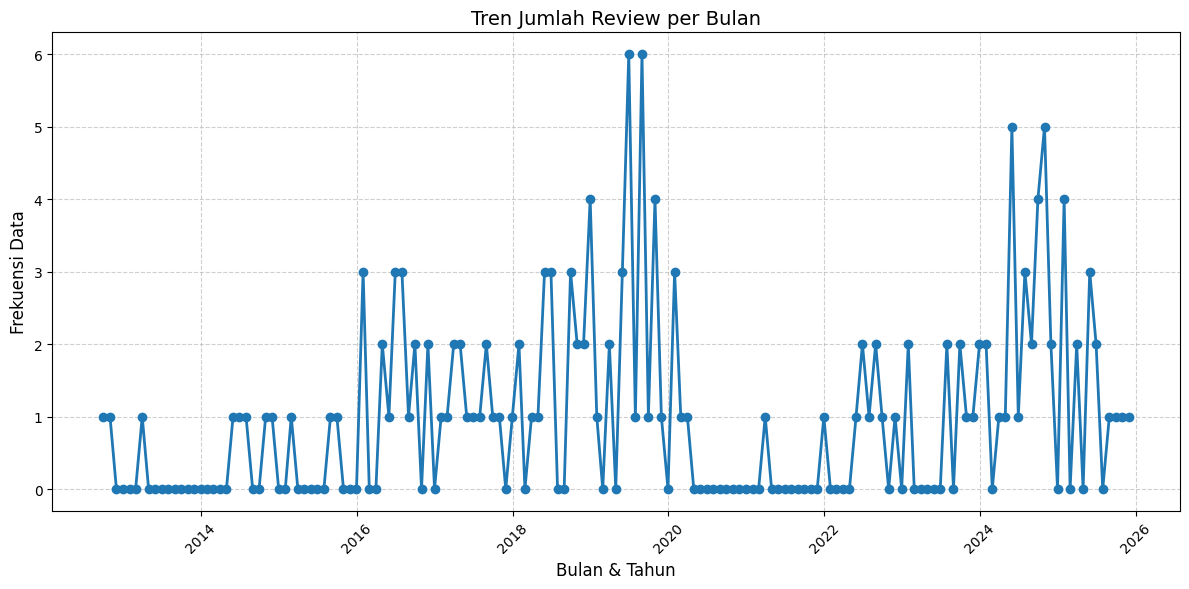

review_date
2019-06-30    6
2019-08-31    6
2024-05-31    5
2024-10-31    5
2025-01-31    4
             ..
2021-02-28    0
2021-01-31    0
2020-12-31    0
2020-11-30    0
2019-04-30    0
Length: 159, dtype: int64

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Pastikan kolom tanggal dikenali sebagai datetime
# Ganti 'published_at_date' dengan 'review_post_date' jika Anda sudah merename kolomnya
date_col = 'review_date' 
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 2. Resample data per Bulan (M) dan hitung jumlahnya (.size())
# Kita set tanggal sebagai index dulu agar bisa di-resample
monthly_counts = df.set_index(date_col).resample('M').size()

# 3. Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='#1f77b4', linewidth=2)

# Mempercantik tampilan
plt.title(f'Tren Jumlah Review per Bulan', fontsize=14)
plt.xlabel('Bulan & Tahun', fontsize=12)
plt.ylabel('Frekuensi Data', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan
plt.show()
monthly_counts.sort_values(ascending=False)

--- Total Data Per Bulan (Akumulasi Semua Tahun) ---
review_date
June         19
January      18
May          18
September    17
October      16
August       15
July         12
March        11
November     11
December      8
April         6
February      3
Name: count, dtype: int64


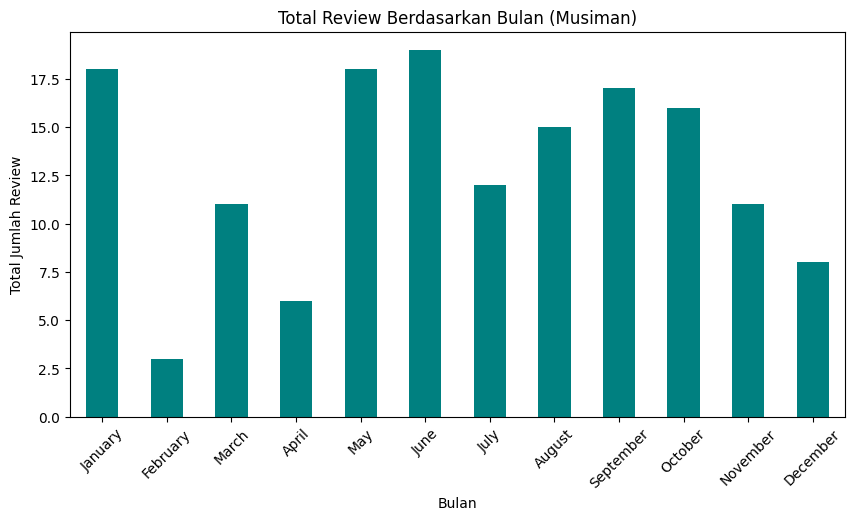

In [34]:
import pandas as pd

# 1. Pastikan kolom target sudah format datetime
col_name = 'review_date'  # Sesuaikan nama kolom tanggal Anda
df[col_name] = pd.to_datetime(df[col_name], errors='coerce')

# 2. Urutan bulan yang benar (agar tidak terurut abjad April duluan)
bulan_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# 3. Ambil nama bulan dan hitung
# dt.month_name() mengambil nama bulan (Jan, Feb, dst) mengabaikan tahun
monthly_counts = df[col_name].dt.month_name().value_counts()

# 4. Urutkan hasil sesuai kalender (bukan jumlah terbanyak)
monthly_counts = monthly_counts.reindex(bulan_order, fill_value=0)

# 5. Tampilkan Hasil
print("--- Total Data Per Bulan (Akumulasi Semua Tahun) ---")
print(monthly_counts.sort_values(ascending=False))

# --- Opsional: Tampilkan dalam Grafik Batang ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='teal')
plt.title('Total Review Berdasarkan Bulan (Musiman)')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Review')
plt.xticks(rotation=45)
plt.show()